## SEC 10-k form MDA Text Analysis

In [285]:
import pandas as pd
import os
from tqdm import tqdm
import pyarrow
import matplotlib.pyplot as plt
import glob
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Set ticker_data folder path 
- Set your working directory and ticker_data folder

In [2]:
# set the working directory
os.chdir(r"D:\University\UB\Research_SEC\Complete_MDA_Text_Data")

In [3]:
os.getcwd()

'D:\\University\\UB\\Research_SEC\\Complete_MDA_Text_Data'

In [4]:
# set the folder that contains ticker_data CSVs
ticker_data_folder = "ticker_data"

In [5]:
# Now create a path to the folder
ticker_data_path = os.path.join(os.getcwd(), ticker_data_folder)

In [6]:
csv_files = glob.glob(f'{ticker_data_path}/*.csv')

In [7]:
# our folder contains 6726 csv files therefore the len should match
len(csv_files)

6726

##### We have to explicitly pass the datatype for ticker column as we have an instance where ticker name is TRUE and python reads it as a boolean

In [8]:
dfs = [pd.read_csv(file, dtype={'ticker': str}) for file in tqdm(csv_files, desc='Reading CSV Files')]

Reading CSV Files: 100%|███████████████████████████████████████████████████████████| 6726/6726 [05:43<00:00, 19.60it/s]


In [282]:
df_append = pd.concat(dfs, axis=0)

In [10]:
df_append.reset_index(drop=True, inplace=True)

#### set an output folder to save files

In [11]:
output_folder = r"D:\University\UB\Research_SEC\Complete_MDA_Text_Data"
folder_name = "output_files"

In [12]:
output_path = output_folder + '\\' + folder_name

In [13]:
if folder_name in os.listdir():
    pass
else:
    os.mkdir(output_path)

In [14]:
os.chdir(output_path)

In [15]:
os.getcwd()

'D:\\University\\UB\\Research_SEC\\Complete_MDA_Text_Data\\output_files'

#### Save as a Parquet file

In [16]:
# df_append.to_parquet('ticker_data_aggregate.parquet', index=False)

In [17]:
df_append

,cik,ticker,title,year,mda_section,processed_timestamp
0,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,Item 7. Management’s Discussion and Analysis o...,2024-01-25 06:32:14.425032
1,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,Item 7. Management’s Discussion and Analysis o...,2024-01-25 06:32:50.003900
2,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,Item 7. Management's Discussion and Analysis o...,2024-01-25 06:31:44.969285
3,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,Item 7. Management's Discussion and Analysis o...,2024-01-25 06:31:46.155222
4,1090872,A,"AGILENT TECHNOLOGIES, INC.",2007,Item 7. Management's Discussion and Analysis o...,2024-01-25 06:31:52.109549
...,...,...,...,...,...,...
73559,846475,ZYXI,ZYNEX INC,2022,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,2024-01-26 08:03:33.117694
73560,846475,ZYXI,ZYNEX INC,2023,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,2024-01-26 08:03:33.622603
73561,846475,ZYXI,ZYNEX INC,2014,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,2024-01-26 08:03:33.695902
73562,846475,ZYXI,ZYNEX INC,2015,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,2024-01-26 08:03:31.647633


### saving df as main

In [18]:
df_main = df_append

#### Checking for the titles from company_tickers.json

In [19]:
df_title = pd.read_json(r"D:\University\UB\Research_SEC\CIK_tickers\company_tickers.json").T

In [20]:
df_title

,cik_str,ticker,title
0,320193,AAPL,Apple Inc.
1,789019,MSFT,MICROSOFT CORP
2,1652044,GOOGL,Alphabet Inc.
3,1018724,AMZN,AMAZON COM INC
4,1045810,NVDA,NVIDIA CORP
...,...,...,...
10904,1823882,MIMWW,Airspan Networks Holdings Inc.
10905,874710,AHPIQ,ALLIED HEALTHCARE PRODUCTS INC
10906,1843862,EOCWF,Elliott Opportunity II Corp.
10907,1062750,SAAYY,SAIPEM S P A /FI


In [21]:
df_title = df_title.sort_values(by='ticker')

In [22]:
df_title.reset_index(drop=True, inplace=True)

In [23]:
noTicker_df_append = df_append[~df_append['ticker'].isin(df_title['ticker'])]

In [24]:
noTicker_df_title = df_title[df_title['title'].isin(noTicker_df_append['title'])]

In [25]:
noTicker_df_append

,cik,ticker,title,year,mda_section,processed_timestamp


In [26]:
noTicker_df_title

,cik_str,ticker,title


In [27]:
for i, row1 in df_title.iterrows():
    ticker1 = row1['ticker']
    title1 = row1['title']
    df_append.loc[df_append['ticker'] == ticker1, 'title2'] = title1

In [28]:
df_append

,cik,ticker,title,year,mda_section,processed_timestamp,title2
0,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,Item 7. Management’s Discussion and Analysis o...,2024-01-25 06:32:14.425032,"AGILENT TECHNOLOGIES, INC."
1,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,Item 7. Management’s Discussion and Analysis o...,2024-01-25 06:32:50.003900,"AGILENT TECHNOLOGIES, INC."
2,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,Item 7. Management's Discussion and Analysis o...,2024-01-25 06:31:44.969285,"AGILENT TECHNOLOGIES, INC."
3,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,Item 7. Management's Discussion and Analysis o...,2024-01-25 06:31:46.155222,"AGILENT TECHNOLOGIES, INC."
4,1090872,A,"AGILENT TECHNOLOGIES, INC.",2007,Item 7. Management's Discussion and Analysis o...,2024-01-25 06:31:52.109549,"AGILENT TECHNOLOGIES, INC."
...,...,...,...,...,...,...,...
73559,846475,ZYXI,ZYNEX INC,2022,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,2024-01-26 08:03:33.117694,ZYNEX INC
73560,846475,ZYXI,ZYNEX INC,2023,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,2024-01-26 08:03:33.622603,ZYNEX INC
73561,846475,ZYXI,ZYNEX INC,2014,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,2024-01-26 08:03:33.695902,ZYNEX INC
73562,846475,ZYXI,ZYNEX INC,2015,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,2024-01-26 08:03:31.647633,ZYNEX INC


In [29]:
for i, row in df_append.iterrows():
    title1 = row['title']
    title2 = row['title2']
    if title1 == title2:
        df_append['title_validation'] = True
    else:
        df_append['title_validation'] = False

In [30]:
df_append

,cik,ticker,title,year,mda_section,processed_timestamp,title2,title_validation
0,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,Item 7. Management’s Discussion and Analysis o...,2024-01-25 06:32:14.425032,"AGILENT TECHNOLOGIES, INC.",True
1,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,Item 7. Management’s Discussion and Analysis o...,2024-01-25 06:32:50.003900,"AGILENT TECHNOLOGIES, INC.",True
2,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,Item 7. Management's Discussion and Analysis o...,2024-01-25 06:31:44.969285,"AGILENT TECHNOLOGIES, INC.",True
3,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,Item 7. Management's Discussion and Analysis o...,2024-01-25 06:31:46.155222,"AGILENT TECHNOLOGIES, INC.",True
4,1090872,A,"AGILENT TECHNOLOGIES, INC.",2007,Item 7. Management's Discussion and Analysis o...,2024-01-25 06:31:52.109549,"AGILENT TECHNOLOGIES, INC.",True
...,...,...,...,...,...,...,...,...
73559,846475,ZYXI,ZYNEX INC,2022,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,2024-01-26 08:03:33.117694,ZYNEX INC,True
73560,846475,ZYXI,ZYNEX INC,2023,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,2024-01-26 08:03:33.622603,ZYNEX INC,True
73561,846475,ZYXI,ZYNEX INC,2014,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,2024-01-26 08:03:33.695902,ZYNEX INC,True
73562,846475,ZYXI,ZYNEX INC,2015,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,2024-01-26 08:03:31.647633,ZYNEX INC,True


In [31]:
df_append['title_validation'].value_counts()

title_validation
True    73564
Name: count, dtype: int64

#### Since our title validation is true for all we'll drop the columns

In [32]:
df_append.drop(columns=['title2','title_validation','processed_timestamp'], inplace=True)

In [33]:
df_append

,cik,ticker,title,year,mda_section
0,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,Item 7. Management’s Discussion and Analysis o...
1,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,Item 7. Management’s Discussion and Analysis o...
2,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,Item 7. Management's Discussion and Analysis o...
3,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,Item 7. Management's Discussion and Analysis o...
4,1090872,A,"AGILENT TECHNOLOGIES, INC.",2007,Item 7. Management's Discussion and Analysis o...
...,...,...,...,...,...
73559,846475,ZYXI,ZYNEX INC,2022,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...
73560,846475,ZYXI,ZYNEX INC,2023,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...
73561,846475,ZYXI,ZYNEX INC,2014,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...
73562,846475,ZYXI,ZYNEX INC,2015,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...


### now we will analyze our MDA column for any inconsistency

In [34]:
df_append_mda_null = df_append[df_append['mda_section'].isnull()]

In [35]:
df_append_mda_null.reset_index(drop=True, inplace=True)

In [36]:
df_append_mda_null

,cik,ticker,title,year,mda_section
0,1098009,AAGH,America Great Health,2012,NaN
1,1098009,AAGH,America Great Health,2013,NaN
2,825313,AB,ALLIANCEBERNSTEIN HOLDING L.P.,2006,NaN
3,825313,AB,ALLIANCEBERNSTEIN HOLDING L.P.,2007,NaN
4,351569,ABCB,Ameris Bancorp,2021,NaN
...,...,...,...,...,...
4845,1423774,ZUO,ZUORA INC,2020,NaN
4846,1423774,ZUO,ZUORA INC,2021,NaN
4847,1423774,ZUO,ZUORA INC,2022,NaN
4848,1423774,ZUO,ZUORA INC,2023,NaN


So we had 73564 instances and out of that 4850 instances where mda_section is NaN

In [37]:
os.getcwd()

'D:\\University\\UB\\Research_SEC\\Complete_MDA_Text_Data\\output_files'

In [38]:
df_append_mda_null.to_csv('ticker_data_no_mda.csv', index=False)

In [39]:
df_append_mda_null['cik'].drop_duplicates()

0       1098009
2        825313
4        351569
7       1253986
31      1447028
         ...   
4831    1136869
4838    1704292
4839    1713683
4845    1423774
4849    1305323
Name: cik, Length: 788, dtype: int64

#### filtering the mda_section without null

In [40]:
df_append_mda = df_append[~df_append['mda_section'].isnull()]

In [41]:
df_append_mda.reset_index(drop=True, inplace=True)

In [42]:
df_append_mda

,cik,ticker,title,year,mda_section
0,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,Item 7. Management’s Discussion and Analysis o...
1,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,Item 7. Management’s Discussion and Analysis o...
2,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,Item 7. Management's Discussion and Analysis o...
3,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,Item 7. Management's Discussion and Analysis o...
4,1090872,A,"AGILENT TECHNOLOGIES, INC.",2007,Item 7. Management's Discussion and Analysis o...
...,...,...,...,...,...
68709,846475,ZYXI,ZYNEX INC,2022,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...
68710,846475,ZYXI,ZYNEX INC,2023,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...
68711,846475,ZYXI,ZYNEX INC,2014,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...
68712,846475,ZYXI,ZYNEX INC,2015,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...


In [43]:
no_mda = list(df_append_mda_null['title'].unique())

In [44]:
no_mda

['America Great Health',
 'ALLIANCEBERNSTEIN HOLDING L.P.',
 'Ameris Bancorp',
 'ARBOR REALTY TRUST INC',
 'Arbutus Biopharma Corp',
 'ProFrac Holding Corp.',
 'ARCH CAPITAL GROUP LTD.',
 'ACHIEVE LIFE SCIENCES, INC.',
 'AECOM',
 'ACRES Commercial Realty Corp.',
 'ACELRX PHARMACEUTICALS INC',
 'AGREE REALTY CORP',
 'Autodesk, Inc.',
 'Ayala Pharmaceuticals, Inc.',
 'Alset Inc.',
 'AMERICAN EAGLE OUTFITTERS INC',
 'APPLIED ENERGETICS, INC.',
 'AES CORP',
 'Atlantis Glory Inc.',
 'AGNC Investment Corp.',
 'AGILE THERAPEUTICS INC',
 'ASHFORD HOSPITALITY TRUST INC',
 'AMERICAN INTERNATIONAL GROUP, INC.',
 'Ameren Illinois Co',
 'ALBANY INTERNATIONAL CORP /DE/',
 'APARTMENT INVESTMENT & MANAGEMENT CO',
 'AIR LEASE CORP',
 'ALICO, INC.',
 'Ally Financial Inc.',
 'Allison Transmission Holdings Inc',
 'Alpine Auto Brokers Inc.',
 'AMBAC FINANCIAL GROUP INC',
 'AMERICAN INTERNATIONAL HOLDINGS CORP.',
 'Ameramex International Inc',
 'AMERIPRISE FINANCIAL INC',
 'Amphastar Pharmaceuticals, Inc.',

In [45]:
# out of the 788 unique instance in no_mda we try to check whether these 788 companies has mda_section for other years/instances
# no_mda_mda is for the list of companies that has mda for some instances
no_mda_mda = []
for i, title in enumerate(df_append_mda['title'].to_list()):
    if title in no_mda:
        no_mda_mda.append(title)

In [46]:
len(set(no_mda_mda))

744

these 744 companies has mda section for certian years but not for all

In [47]:
len(no_mda)

788

In [48]:
# we try to find the companies that doesn't have mda at all
companies_no_mda = []
for item in no_mda:
    if item not in no_mda_mda:
        companies_no_mda.append(item)

In [49]:
companies_no_mda

['ProFrac Holding Corp.',
 'Assertio Holdings, Inc.',
 'TopBuild Corp',
 'CF Industries Holdings, Inc.',
 'Chewy, Inc.',
 'ENTERGY ARKANSAS, LLC',
 'Excelerate Energy, Inc.',
 'ENTERGY LOUISIANA, LLC',
 'EMCOR Group, Inc.',
 'ENTERGY MISSISSIPPI, LLC',
 'ENTERGY NEW ORLEANS, LLC',
 'Enova International, Inc.',
 'Elastic N.V.',
 'ENTERGY TEXAS, INC.',
 'ENTERGY CORP /DE/',
 'Evolent Health, Inc.',
 'National Vision Holdings, Inc.',
 'Generations Bancorp NY, Inc.',
 'GOLD RESERVE INC',
 'GXO Logistics, Inc.',
 'HireRight Holdings Corp',
 'Integrated Cannabis Solutions, Inc.',
 'Lamb Weston Holdings, Inc.',
 'Medtronic plc',
 'M-tron Industries, Inc.',
 'New Mountain Finance Corp',
 'National Storage Affiliates Trust',
 'NYIAX, INC.',
 'PRINCIPAL FINANCIAL GROUP INC',
 'PJT Partners Inc.',
 'Palomar Holdings, Inc.',
 'Rent the Runway, Inc.',
 'Latham Group, Inc.',
 'SYSCO CORP',
 'Transnational Group, Inc.',
 'Telesis Bio Inc.',
 'Trade Desk, Inc.',
 'Urban Edge Properties',
 'USD Partner

In [50]:
filtered_df_no_mda = df_append[df_append['title'].isin(companies_no_mda)]

In [51]:
filtered_df_no_mda.reset_index(drop=True, inplace=True)

In [52]:
os.getcwd()

'D:\\University\\UB\\Research_SEC\\Complete_MDA_Text_Data\\output_files'

In [53]:
filtered_df_no_mda.to_csv('ticker_data_no_mda_all.csv', index=False)

### Now when we have removed the null values and updated our df, let's try to analyze the mda that we have 

In [54]:
df_mda = df_append_mda['mda_section']

## MDA Len

In [59]:
df_append_mda.loc[:, 'preprocessed_mda'] = df_append_mda['mda_section'].apply(lambda x: x[93:])

In [61]:
df_append_mda.loc[:, 'preprocessed_mda'] = df_append_mda['preprocessed_mda'].apply(lambda x : x.lower())

In [63]:
substring1 = "item 7a. quantitative and qualitative disclosures about market risk"
substring2 = "item 7. management’s discussion and analysis of financial condition and results of operations"
df_append_mda.loc[:, 'preprocessed_mda'] = df_append_mda['preprocessed_mda'].apply(lambda x : x.replace(substring1, ''))
df_append_mda.loc[:, 'preprocessed_mda'] = df_append_mda['preprocessed_mda'].apply(lambda x : x.replace(substring2, ''))

In [64]:
df_append_mda

,cik,ticker,title,year,mda_section,preprocessed_mda
0,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,Item 7. Management’s Discussion and Analysis o...,the following discussion should be read in co...
1,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,Item 7. Management’s Discussion and Analysis o...,the following discussion should be read in co...
2,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,Item 7. Management's Discussion and Analysis o...,the following discussion should be read in co...
3,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,Item 7. Management's Discussion and Analysis o...,
4,1090872,A,"AGILENT TECHNOLOGIES, INC.",2007,Item 7. Management's Discussion and Analysis o...,
...,...,...,...,...,...,...
68709,846475,ZYXI,ZYNEX INC,2022,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,this annual report on form 10-k contains state...
68710,846475,ZYXI,ZYNEX INC,2023,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,this annual report on form 10-k contains state...
68711,846475,ZYXI,ZYNEX INC,2014,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,we currently have five subsidiaries; zynex me...
68712,846475,ZYXI,ZYNEX INC,2015,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,the company currently has five subsidiaries; ...


In [286]:
df_append_mda.loc[:,'words_mda_section'] = df_append_mda['mda_section'].apply(lambda x:len(x.split()))

In [288]:
# df_append_mda.loc[:,'words_preprocessed_mda'] = df_append_mda['preprocessed_mda'].apply(lambda x:len(x.split()))

In [291]:
df_append_mda.drop(columns='words_mda_section_stopwords', inplace=True)

In [71]:
df_mda_retrieval_error = df_append_mda[df_append_mda['words_preprocessed_mda'] == 0]

In [78]:
os.getcwd()

'D:\\University\\UB\\Research_SEC\\Complete_MDA_Text_Data\\output_files'

In [79]:
df_mda_retrieval_error.to_csv('mda_retrieval_error.csv', index = False)

In [118]:
df_preprocessed = df_append_mda[df_append_mda['words_preprocessed_mda'] != 0]

In [340]:
df_mda_100 = df_append_mda[df_append_mda['words_preprocessed_mda']<100]

In [341]:
df_mda_100

,cik,ticker,title,year,mda_section,preprocessed_mda,words_mda_section,words_preprocessed_mda
3,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,Item 7. Management's Discussion and Analysis o...,,22,0
4,1090872,A,"AGILENT TECHNOLOGIES, INC.",2007,Item 7. Management's Discussion and Analysis o...,,22,0
5,1090872,A,"AGILENT TECHNOLOGIES, INC.",2008,Item 7. Management's Discussion and Analysis o...,,22,0
23,1675149,AA,Alcoa Corp,2017,Item 7. (Management’s Discussion and Analysis ...,"s), including the disclosures under segment in...",40,28
24,1675149,AA,Alcoa Corp,2018,Item 7. (Management’s Discussion and Analysis ...,"s), including the disclosures under segment in...",40,28
...,...,...,...,...,...,...,...,...
68510,1823575,ZFOX,"ZeroFox Holdings, Inc.",2023,MD&A section not found.,,4,0
68513,1823575,ZFOXW,"ZeroFox Holdings, Inc.",2023,MD&A section not found.,,4,0
68565,1131312,ZNOG,ZION OIL & GAS INC,2006,ITEM 7. FINANCIAL STATEMENTS The financial sta...,age f-1 below.,17,3
68581,1131312,ZNOGW,ZION OIL & GAS INC,2006,ITEM 7. FINANCIAL STATEMENTS The financial sta...,age f-1 below.,17,3


In [177]:
df_preprocessed = df_preprocessed[df_preprocessed['words_preprocessed_mda']>100]

In [179]:
df_preprocessed.reset_index(drop=True, inplace=True)

In [180]:
df_preprocessed['words_preprocessed_mda'].min()

101

In [138]:
# df_preprocessed.to_csv('df_preprocessed_step1.csv',index= False)

In [181]:
df_preprocessed

,cik,ticker,title,year,mda_section,preprocessed_mda,words_mda_section,words_preprocessed_mda
0,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,Item 7. Management’s Discussion and Analysis o...,the following discussion should be read in co...,11457,11435
1,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,Item 7. Management’s Discussion and Analysis o...,the following discussion should be read in co...,19164,19142
2,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,Item 7. Management's Discussion and Analysis o...,the following discussion should be read in co...,12508,12486
3,1090872,A,"AGILENT TECHNOLOGIES, INC.",2009,Item 7. Management's Discussion and Analysis o...,the following discussion should be read in co...,13720,13698
4,1090872,A,"AGILENT TECHNOLOGIES, INC.",2010,Item 7. Management's Discussion and Analysis o...,the following discussion should be read in co...,13367,13345
...,...,...,...,...,...,...,...,...
58930,846475,ZYXI,ZYNEX INC,2022,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,this annual report on form 10-k contains state...,4470,4450
58931,846475,ZYXI,ZYNEX INC,2023,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,this annual report on form 10-k contains state...,4786,4766
58932,846475,ZYXI,ZYNEX INC,2014,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,we currently have five subsidiaries; zynex me...,7363,7341
58933,846475,ZYXI,ZYNEX INC,2015,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,the company currently has five subsidiaries; ...,7299,7277


In [252]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.probability import FreqDist
from gensim import corpora, models

In [197]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srsha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [198]:
def preprocess_text(text):
    tokens = word_tokenize(text)  # Tokenization    
    stop_words = set(stopwords.words('english'))  # Stopwords
    tokens = [token for token in tokens if token not in stop_words]  
    tokens = [token for token in tokens if token not in string.punctuation]  # Punctuation
    return ' '.join(tokens)
    

In [203]:
# df_preprocessed['preprocessed_mda'] = df_preprocessed['preprocessed_mda'].apply((preprocess_text))

In [292]:
df_preprocessed.loc[:,'words_preprocessed_mda_stopwords'] = df_preprocessed['preprocessed_mda'].apply(lambda x:len(x.split()))

In [293]:
df_preprocessed

,cik,ticker,title,year,mda_section,preprocessed_mda,words_mda_section,words_preprocessed_mda,words_preprocessed_mda_stopwords,word_diff_stopwords
0,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,Item 7. Management’s Discussion and Analysis o...,following discussion read conjunction consolid...,11457,11435,7013,4422
1,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,Item 7. Management’s Discussion and Analysis o...,following discussion read conjunction consolid...,19164,19142,11646,7496
2,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,Item 7. Management's Discussion and Analysis o...,following discussion read conjunction consolid...,12508,12486,8063,4423
3,1090872,A,"AGILENT TECHNOLOGIES, INC.",2009,Item 7. Management's Discussion and Analysis o...,following discussion read conjunction consolid...,13720,13698,8901,4797
4,1090872,A,"AGILENT TECHNOLOGIES, INC.",2010,Item 7. Management's Discussion and Analysis o...,following discussion read conjunction consolid...,13367,13345,8766,4579
...,...,...,...,...,...,...,...,...,...,...
58922,846475,ZYXI,ZYNEX INC,2022,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,annual report form 10-k contains statements fo...,4470,4450,2866,1584
58923,846475,ZYXI,ZYNEX INC,2023,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,annual report form 10-k contains statements fo...,4786,4766,3107,1659
58924,846475,ZYXI,ZYNEX INC,2014,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,currently five subsidiaries zynex medical inc....,7363,7341,4435,2906
58925,846475,ZYXI,ZYNEX INC,2015,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,company currently five subsidiaries zynex medi...,7299,7277,4411,2866


In [294]:
df_preprocessed.loc[:,'word_diff_stopwords'] = df_preprocessed['words_preprocessed_mda'] - df_preprocessed['words_preprocessed_mda_stopwords']

In [297]:
# df_preprocessed[df_preprocessed['word_diff_stopwords'] < 0]

In [298]:
df_preprocessed = df_preprocessed[df_preprocessed['word_diff_stopwords'] > 0]

In [299]:
df_preprocessed.reset_index(drop=True, inplace=True)

In [301]:
df_preprocessed.drop(columns='mda_section', inplace=True)

In [302]:
df_preprocessed

,cik,ticker,title,year,preprocessed_mda,words_mda_section,words_preprocessed_mda,words_preprocessed_mda_stopwords,word_diff_stopwords
0,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,following discussion read conjunction consolid...,11457,11435,7013,4422
1,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,following discussion read conjunction consolid...,19164,19142,11646,7496
2,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,following discussion read conjunction consolid...,12508,12486,8063,4423
3,1090872,A,"AGILENT TECHNOLOGIES, INC.",2009,following discussion read conjunction consolid...,13720,13698,8901,4797
4,1090872,A,"AGILENT TECHNOLOGIES, INC.",2010,following discussion read conjunction consolid...,13367,13345,8766,4579
...,...,...,...,...,...,...,...,...,...
58922,846475,ZYXI,ZYNEX INC,2022,annual report form 10-k contains statements fo...,4470,4450,2866,1584
58923,846475,ZYXI,ZYNEX INC,2023,annual report form 10-k contains statements fo...,4786,4766,3107,1659
58924,846475,ZYXI,ZYNEX INC,2014,currently five subsidiaries zynex medical inc....,7363,7341,4435,2906
58925,846475,ZYXI,ZYNEX INC,2015,company currently five subsidiaries zynex medi...,7299,7277,4411,2866


In [323]:
df_preprocessed[df_preprocessed['words_preprocessed_mda_stopwords']==160331]

,cik,ticker,title,year,preprocessed_mda,words_mda_section,words_preprocessed_mda,words_preprocessed_mda_stopwords,word_diff_stopwords
42283,922224,PPL,PPL Corp,2012,overview '' information concerning risks faced...,235225,235203,160331,74872


In [304]:
df_preprocessed['words_preprocessed_mda_stopwords'].min()

59

In [305]:
mean_words_mda_section = df_preprocessed['words_preprocessed_mda_stopwords'].mean()

In [306]:
std_words_mda_section = df_preprocessed['words_preprocessed_mda_stopwords'].std()

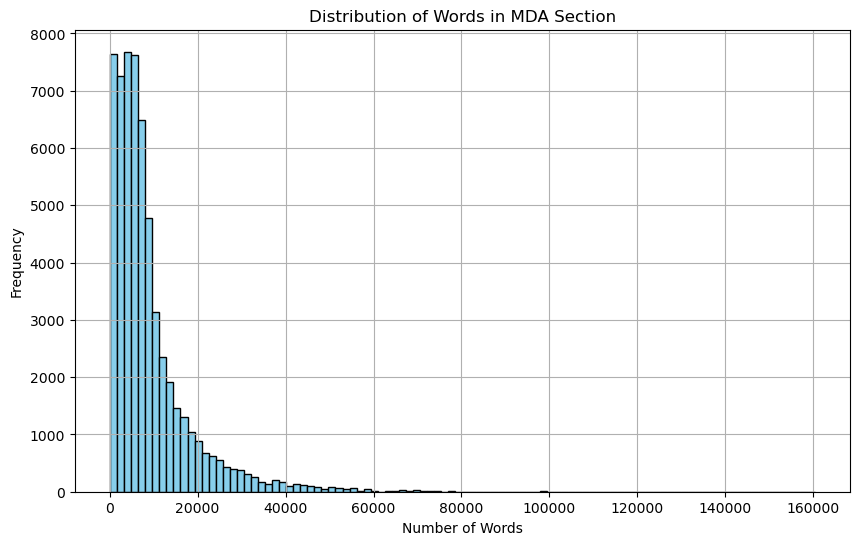

In [308]:
plt.figure(figsize=(10, 6))
plt.hist(df_preprocessed['words_preprocessed_mda_stopwords'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Words in MDA Section')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### FinBERT

In [309]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
import torch
from tqdm import tqdm

In [310]:
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone', do_lower_case=True)
model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')

In [311]:
def analyze_sentiment(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()
    sentiment_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    sentiment = sentiment_map[predicted_label]
    return sentiment

In [312]:
sentiments = []
for text in tqdm(df_preprocessed['preprocessed_mda'][:500]):
    sentiment = analyze_sentiment(text)
    sentiments.append(sentiment)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [09:21<00:00,  1.12s/it]


In [280]:
sentiments

['Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Neutral',
 'Neutral',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Negative',
 'Negative',
 'Neutral',
 'Negative',
 'Positive',
 'Neutral',
 'Neutral'

In [316]:
# df_preprocessed['tokenized_mda'] = df_preprocessed['preprocessed_mda'].apply(word_tokenize)

In [327]:
df_preprocessed

,cik,ticker,title,year,preprocessed_mda,words_mda_section,words_preprocessed_mda,words_preprocessed_mda_stopwords,word_diff_stopwords
0,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,following discussion read conjunction consolid...,11457,11435,7013,4422
1,1090872,A,"AGILENT TECHNOLOGIES, INC.",2002,following discussion read conjunction consolid...,19164,19142,11646,7496
2,1090872,A,"AGILENT TECHNOLOGIES, INC.",2006,following discussion read conjunction consolid...,12508,12486,8063,4423
3,1090872,A,"AGILENT TECHNOLOGIES, INC.",2009,following discussion read conjunction consolid...,13720,13698,8901,4797
4,1090872,A,"AGILENT TECHNOLOGIES, INC.",2010,following discussion read conjunction consolid...,13367,13345,8766,4579
...,...,...,...,...,...,...,...,...,...
58922,846475,ZYXI,ZYNEX INC,2022,annual report form 10-k contains statements fo...,4470,4450,2866,1584
58923,846475,ZYXI,ZYNEX INC,2023,annual report form 10-k contains statements fo...,4786,4766,3107,1659
58924,846475,ZYXI,ZYNEX INC,2014,currently five subsidiaries zynex medical inc....,7363,7341,4435,2906
58925,846475,ZYXI,ZYNEX INC,2015,company currently five subsidiaries zynex medi...,7299,7277,4411,2866


In [344]:
total_instances = df_append.shape[0]

In [346]:
mda_section_never = filtered_df_no_mda.shape[0]

In [349]:
mda_section_NaN = df_append_mda_null.shape[0]

In [351]:
retrieval_error = df_mda_retrieval_error.shape[0]

In [352]:
mda_100_words = df_mda_100.shape[0]

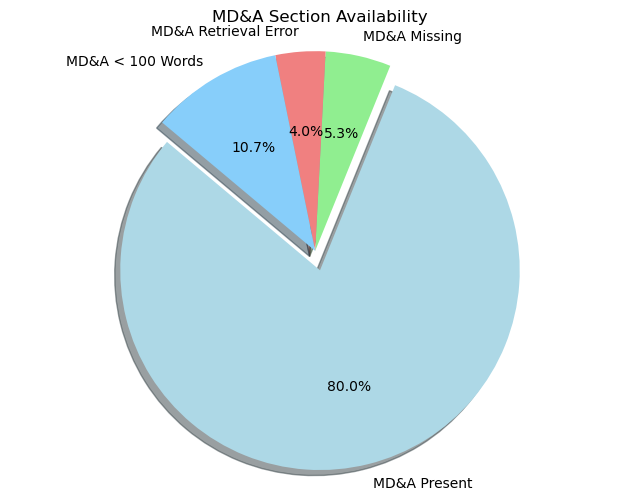

In [353]:
# Data
labels = ['MD&A Present', 'MD&A Missing', 'MD&A Retrieval Error', 'MD&A < 100 Words']
sizes = [total_instances - mda_section_never, mda_section_NaN, retrieval_error, mda_100_words]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('MD&A Section Availability')
plt.axis('equal')  

plt.show()